done


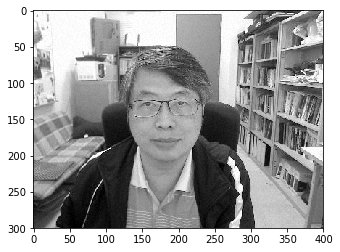

In [32]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image as im
import numpy as np
import random as rd

K1=im.open('C:\\Users\\Administrator\\Desktop\\ML2018_410321156\\data\\key1.png')  #加密密鑰
K2=im.open('C:\\Users\\Administrator\\Desktop\\ML2018_410321156\\data\\key2.png')  #加密密鑰
E=im.open('C:\\Users\\Administrator\\Desktop\\ML2018_410321156\\data\\E.png')  #加密
I=im.open('C:\\Users\\Administrator\\Desktop\\ML2018_410321156\\data\\I.png')  #輸入

EP=im.open('C:\\Users\\Administrator\\Desktop\\ML2018_410321156\\data\\Eprime.png')  #待解密...

width_=E.size[0]
height_=E.size[1]
output=im.new("L",(width_,height_))#"L"8位元灰階影像

class AdalineGD():
#Set 𝐸𝑝𝑜𝑐ℎ=1, 𝛼:the learning rate (suggest to be a small constant such as 0.00001)
    def __init__(self,eta=0.00001,epoch=1):
        self.eta=eta
        self.epoch=epoch
        self.w=[rd.random(),rd.random(),rd.random()]
#訓練
    def Train(self):
        a=np.zeros((width_,height_),dtype='f')#"f"為浮點數
        e=np.zeros((width_,height_),dtype='f')
        epoch=0
        wk=[0.0,0.0,0.0]
        while epoch<self.epoch and abs(wk[0]-self.w[0])+abs(wk[1]-self.w[1])+abs(wk[2]-self.w[2])>0.00001:
            #𝐰=[𝑤1,𝑤2,𝑤3]
            for i in range(0,3):
                wk[i]=self.w[i]
                
            for i in range(0,width_):
                for j in range(0,height_):
                    #𝑎(𝑘) = 𝐰𝐸𝑝𝑜𝑐ℎ(𝑘)𝑇𝐱(k), where 𝐱(𝑘) = [𝐾1(𝑘),𝐾2(𝑘),𝐼(𝑘)]T 
                    a[i][j]=self.w[0]*K1.getpixel((i,j))+self.w[1]*K2.getpixel((i,j))+self.w[2]*I.getpixel((i,j))
                    #𝑒(𝑘) = 𝐸(𝑘) − 𝑎(𝑘)
                    e[i][j]=E.getpixel((i,j)) - a[i][j]
                    #𝒘𝑬𝒑𝒐𝒄𝒉(𝑘 + 1) = 𝐰𝑬𝒑𝒐𝒄𝒉(𝑘) + 𝛼 ⋅ 𝑒(𝑘) ⋅ 𝐱(𝑘) 
                    self.w[0]=self.w[0] + self.eta * e[i][j] * K1.getpixel((i,j))
                    self.w[1]=self.w[1] + self.eta * e[i][j] * K2.getpixel((i,j))
                    self.w[2]=self.w[2] + self.eta * e[i][j] * I.getpixel((i,j))
            epoch=epoch+1

        return self

AGD=AdalineGD(eta=0.00001,epoch=1).Train()

#解密
for i in range(0,width_):
    for j in range(0,height_):
        #I=(𝐸−w1𝐾1−𝑤2𝐾2)/3
        output.putpixel((i,j),int(round((EP.getpixel((i,j))-AGD.w[0]*K1.getpixel((i,j))-AGD.w[1]*K2.getpixel((i,j)))/AGD.w[2])))
print('done')
plt.imshow(output)
plt.show()
output.save('output.png')
